In [11]:
from pandas import DataFrame
import pandas as pd
import numpy as np

df = pd.read_csv("./dataset/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [14]:
loan_status_index = [" loan_status"]
loan_status_df = df[loan_status_index]

loan_status_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    loan_status  4269 non-null   object
dtypes: object(1)
memory usage: 33.5+ KB


### Check if there's missing value in the dataset

In [19]:
print(loan_status_df.isnull().values.any())
loan_status_df.isnull().sum()

False


price_range    0
dtype: int64

### Count data composition on dependent variable (price_range)

In [3]:
df.loan_status.value_counts()

AttributeError: 'DataFrame' object has no attribute 'loan_status'

### Identify size and information of the independent attributes

In [12]:
df_independent_attr = df.drop(price_range_df, axis=1)
df_independent_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Check if there's missing value on the independent attributes dataset

In [18]:
df_independent_attr.isnull().values.any()

False

In [20]:
categorical_df = df.select_dtypes(include=["object"])
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Empty DataFrame


In [21]:
numerical_df = df.select_dtypes(include=["int64", "float64"])
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [22]:
numerical_index = numerical_df.columns
numerical_index

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

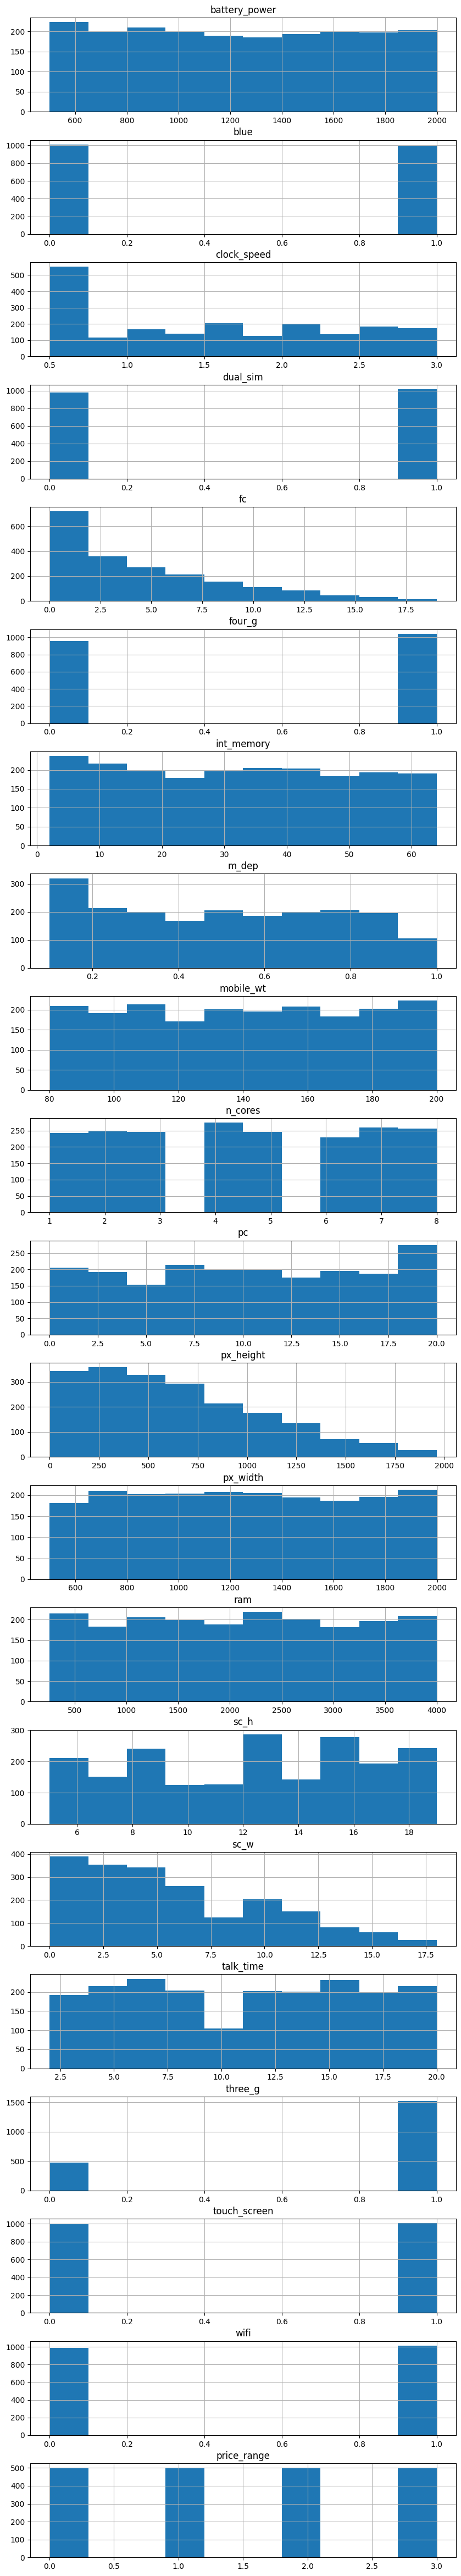

In [29]:
import matplotlib
import matplotlib.pyplot as plt

df.hist(column=numerical_index, figsize=(10,60), layout=(21, 1))
plt.show()

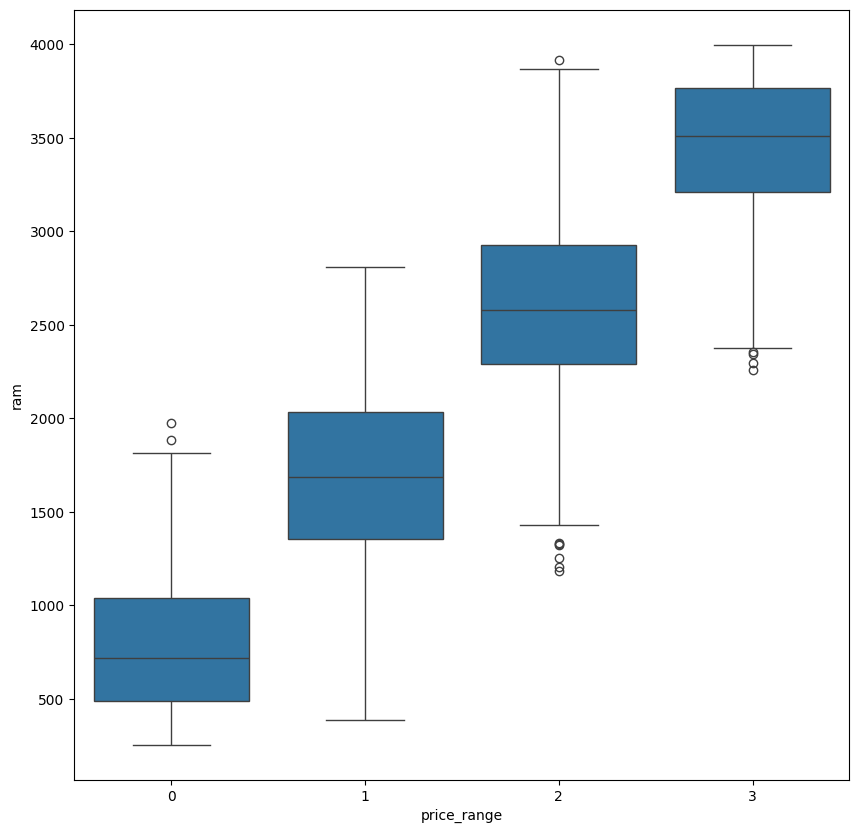

In [30]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
sns.boxplot(x="price_range", y="ram", data=df)
plt.show()

In [31]:
df[["price_range", "ram"]].groupby(["price_range"], as_index=False).mean().sort_values(by="ram", ascending=False)

,price_range,ram
3,3,3449.232
2,2,2582.816
1,1,1679.490
0,0,785.314


### Doing T-Test

In [40]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

df = df[(np.abs(stats.zscore(df["ram"])) < 3)]

price_0 = df[df["price_range"]==0]["ram"]
price_1 = df[df["price_range"]==1]["ram"]

price_0 = price_0.values.tolist()
price_0 = random.sample(price_0, 10)
price_1 = price_1.values.tolist()
price_1 = random.sample(price_1, 10)

ttest, pval = ttest_ind(price_1, price_0, equal_var=False)

print("T-Test: ", ttest)
print("P value: ", pval)

if pval < 0.05:
    print("Ho ditolak")
else:
    print("Ho diterima")

T-Test:  4.668095983053837
P value:  0.0002290987196487166
Ho ditolak


In [41]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

df = df[(np.abs(stats.zscore(df["ram"])) < 3)]

price_0 = df[df["price_range"]==0]["clock_speed"]
price_1 = df[df["price_range"]==1]["clock_speed"]

price_0 = price_0.values.tolist()
price_0 = random.sample(price_0, 10)
price_1 = price_1.values.tolist()
price_1 = random.sample(price_1, 10)

ttest, pval = ttest_ind(price_1, price_0, equal_var=False)

print("T-Test: ", ttest)
print("P value: ", pval)

if pval < 0.05:
    print("Ho ditolak")
else:
    print("Ho diterima")

T-Test:  -0.19733321400867357
P value:  0.845796956295648
Ho diterima


### Define contingency table

In [46]:
contingency = pd.crosstab(df["clock_speed"], df["price_range"], margins=False)
contingency

price_range,0,1,2,3
clock_speed,,,,
0.5,109,105,96,103
0.6,20,22,16,16
0.7,15,17,19,13
0.8,12,16,18,12
0.9,18,13,13,14
1.0,14,22,12,13
1.1,12,10,13,16
1.2,12,15,18,11
1.3,8,20,16,24


In [47]:
from scipy.stats import chi2_contingency, chi2

stat, p, dof, expected = chi2_contingency(contingency)

print("dof = %d" % dof)
print("p_value", p)
print(expected)

prob = 0.99
critical = chi2.ppf(prob, dof)
print("probabilitas=%.3f, critical=%.3f, stat=%.3f," % (prob, critical, stat))

if abs(stat >= critical):
    print("Dependent (tolak Ho)")
else:
    print("Independent (terima Ho)")

dof = 75
p_value 0.7814696005897379
[[103.25 103.25 103.25 103.25]
 [ 18.5   18.5   18.5   18.5 ]
 [ 16.    16.    16.    16.  ]
 [ 14.5   14.5   14.5   14.5 ]
 [ 14.5   14.5   14.5   14.5 ]
 [ 15.25  15.25  15.25  15.25]
 [ 12.75  12.75  12.75  12.75]
 [ 14.    14.    14.    14.  ]
 [ 17.    17.    17.    17.  ]
 [ 17.5   17.5   17.5   17.5 ]
 [ 16.75  16.75  16.75  16.75]
 [ 19.    19.    19.    19.  ]
 [ 15.    15.    15.    15.  ]
 [ 15.5   15.5   15.5   15.5 ]
 [ 16.25  16.25  16.25  16.25]
 [ 16.75  16.75  16.75  16.75]
 [ 19.    19.    19.    19.  ]
 [ 14.75  14.75  14.75  14.75]
 [ 19.5   19.5   19.5   19.5 ]
 [ 14.5   14.5   14.5   14.5 ]
 [ 18.5   18.5   18.5   18.5 ]
 [ 13.75  13.75  13.75  13.75]
 [ 13.75  13.75  13.75  13.75]
 [ 21.25  21.25  21.25  21.25]
 [ 15.5   15.5   15.5   15.5 ]
 [  7.     7.     7.     7.  ]]
probabilitas=0.990, critical=106.393, stat=65.264,
Independent (terima Ho)


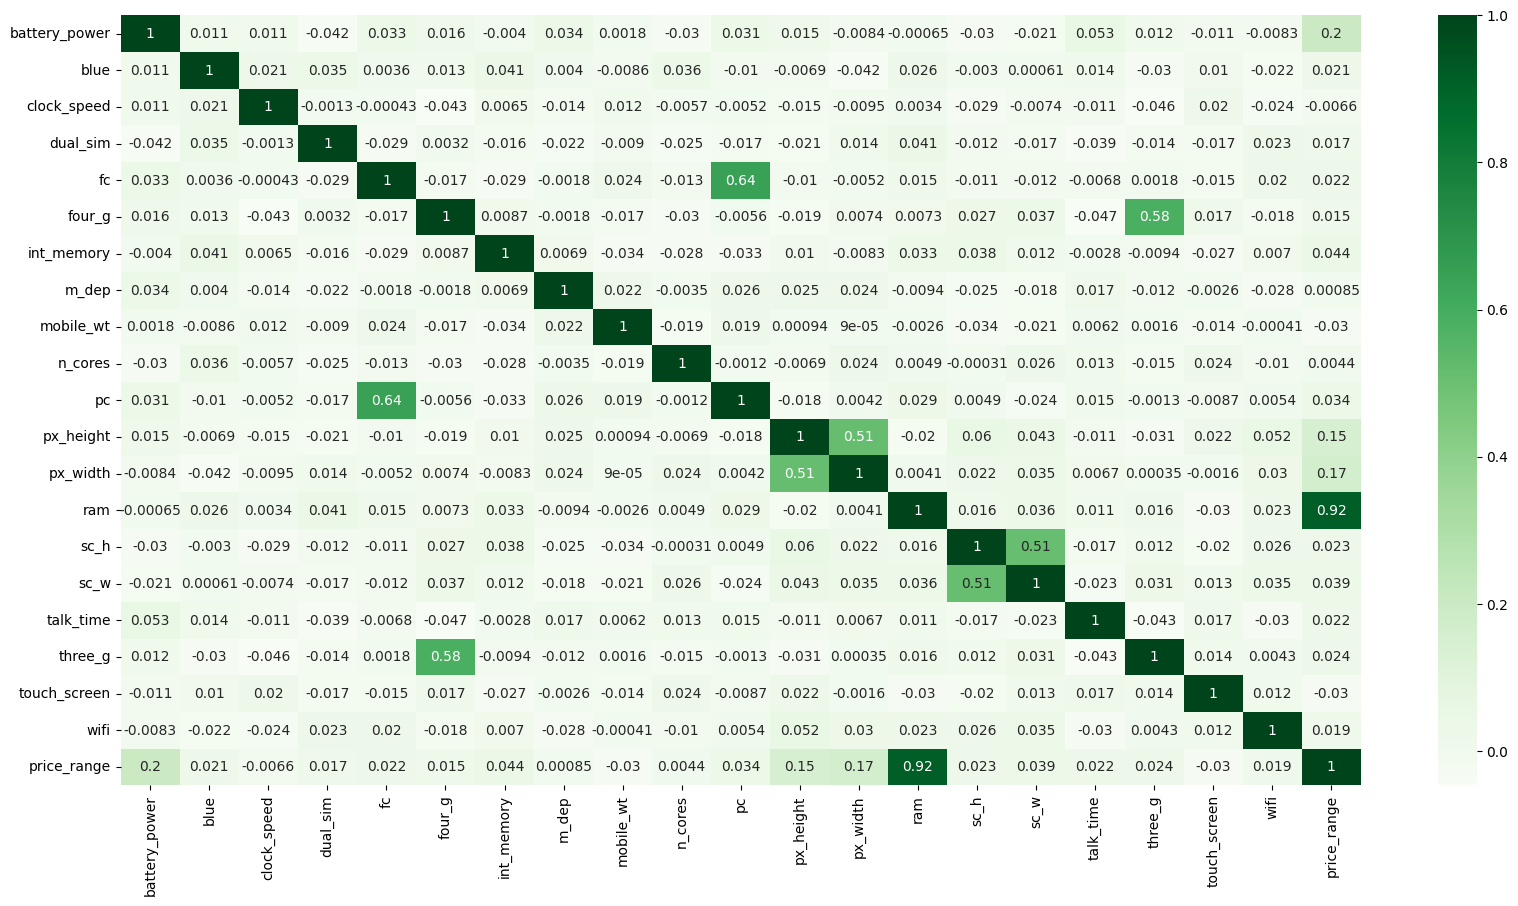

In [67]:
plt.figure(figsize=(20,10))

cor = df.corr()
sns.heatmap(cor, annot=True, cmap="Greens")
plt.show()


### Select highly correlated features

In [68]:
cor_target = abs(cor["price_range"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

battery_power    0.200723
px_height        0.148858
px_width         0.165818
ram              0.917046
price_range      1.000000
Name: price_range, dtype: float64